<a href="https://colab.research.google.com/github/NtimTim/DS_School_Home_Work/blob/main/Hometask/Task2_dmrf_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task2_dmrf_visual.ipynb)

# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



In [ ]:
# Ваш код здесь...

In [4]:
import pickle

In [5]:
import pandas as pd


In [6]:
from google.colab import files
uploaded = files.upload()
# выбираем df_nashdomrf.pkl

Saving df_nashdomrf.pkl to df_nashdomrf (2).pkl


In [7]:
df = pickle.load(open('df_nashdomrf.pkl', 'rb'))
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(11714, 110)

In [9]:
df.columns
#df.keys()

Index(['id', 'hobjId', 'pdId', 'region', 'address', 'floorMin', 'floorMax',
       'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc',
       ...
       'metro.time', 'metro.isWalk', 'metro.colors', 'complexShortNm',
       'airQualityIndexValue', 'greenAreaIndexValue',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object', length=110)

In [10]:
df.sample(5)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
5578,56225,136939,779061,61,г Таганрог,11,11,189,2026-09-30,Панель,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1862,55864,136578,795769,65,город Южно-Сахалинск,2,17,126,2028-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4843,40007,120441,449631,39,"г Светлогорск, ул Ольховая, д. 32, корпус 17",6,6,45,2024-09-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1314,53520,134194,684861,77,г Москва,10,10,60,2026-03-31,Монолит-кирпич,...,NaN,NaN,NaN,СберСити в Рублёво-Архангельском,NaN,5.0,NaN,NaN,NaN,NaN
8428,55229,135952,778783,25,"город Владивосток, ул Двенадцатая, д. 8, вл. дом",1,1,0,2025-09-30,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
pd.set_option('display.max_columns',None)
#df.columns.tolist()
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,34754,1,0,0.0,0,0,True,28-02-2025 12:00,0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,8.0,7.0,15,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6251.10,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6251.1,70,0,True,28-02-2025 12:00,0,1.0,1.0,1.0,11.0,10.0,1,1,0.0,5.0,4.0,9,0.999984,47163.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,"2,96",0.0,24.0,

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df_no_NaN = df.loc[df['objPriceAvg'].notnull()]
df_region_price_series = df_no_NaN.groupby('region', as_index=True)['objPriceAvg'].mean()
df_region_price_series

region
1      97175.000000
2     102701.614035
3      83158.040816
4     110104.777778
5      56562.166667
          ...      
86    110474.466667
89    144591.076923
91    139035.682759
92    141886.416667
93    114752.000000
Name: objPriceAvg, Length: 82, dtype: float64

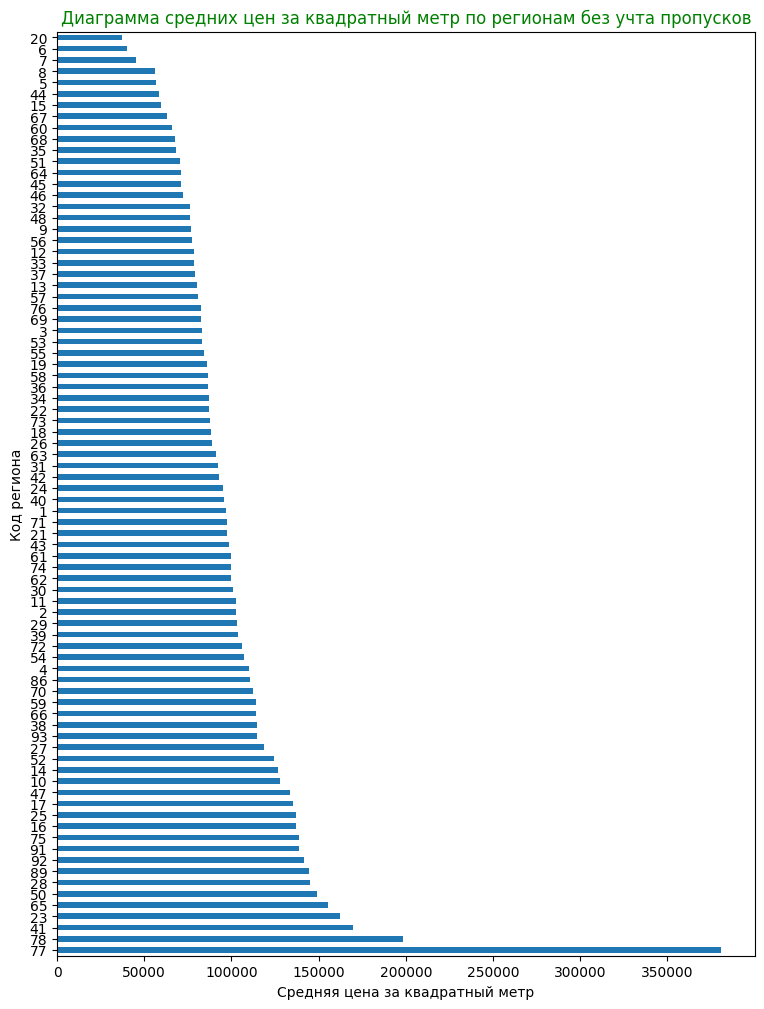

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
df_region_price_series.sort_values(ascending=False).plot(kind='barh')
plt.title('Диаграмма средних цен за квадратный метр по регионам без учта пропусков', size = 12, color = 'g')
plt.xlabel('Средняя цена за квадратный метр')
plt.ylabel('Код региона')
plt.show()


In [ ]:
#Делаем выводы^
# самые высокие средние цены в 77 регионе -Москва,
# на втором месте 78 регион - Санкт-Петербург,
# на третьем 41 регион - Петропавлоовск-Камчатский
# самые низкие в 20 регионе - Грозный

In [15]:
df['year']= df['objReady100PercDt'].astype(str).str[0:4]
df['year']

0        2024
1        2024
2        2023
3        2024
4        2023
         ... 
11709    2026
11710    2030
11711    2029
11712    2027
11713    2024
Name: year, Length: 11714, dtype: object

In [23]:
df_region_year_square_df = df.groupby(['region', 'year'])['objSquareLiving'].sum()
df_region_year_square_df

region  year
1       2023     11350.25
        2024    142047.45
        2025    135031.46
        2026     59532.99
2       2023    248815.05
                  ...    
92      2023     12196.76
        2024     43127.30
        2025     41698.81
93      2024     11823.04
        2028      2324.20
Name: objSquareLiving, Length: 464, dtype: float64

<Axes: title={'center': 'Столбчатая даграмма с накоплением по регионам по годам'}, ylabel='region,year'>

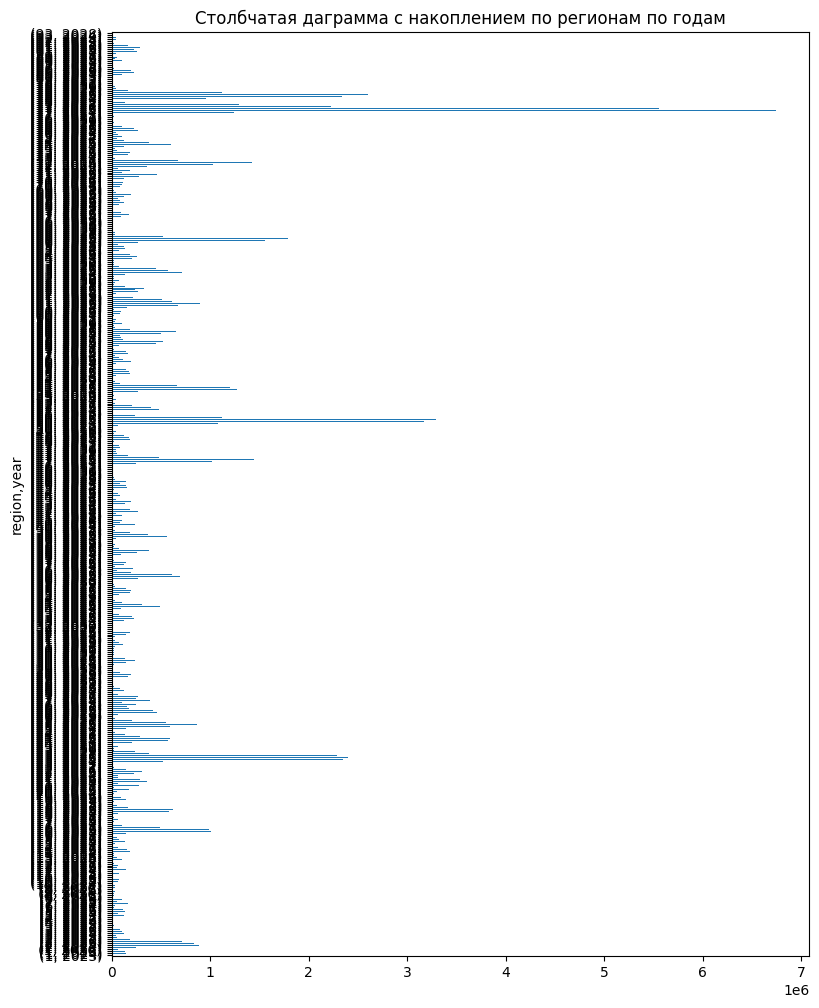

In [17]:
df_region_year_square_df.plot(
    x= 'region',
    kind = 'barh',
    stacked = True,
    title = 'Столбчатая даграмма с накоплением по регионам по годам',
    mark_right = True
)

In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

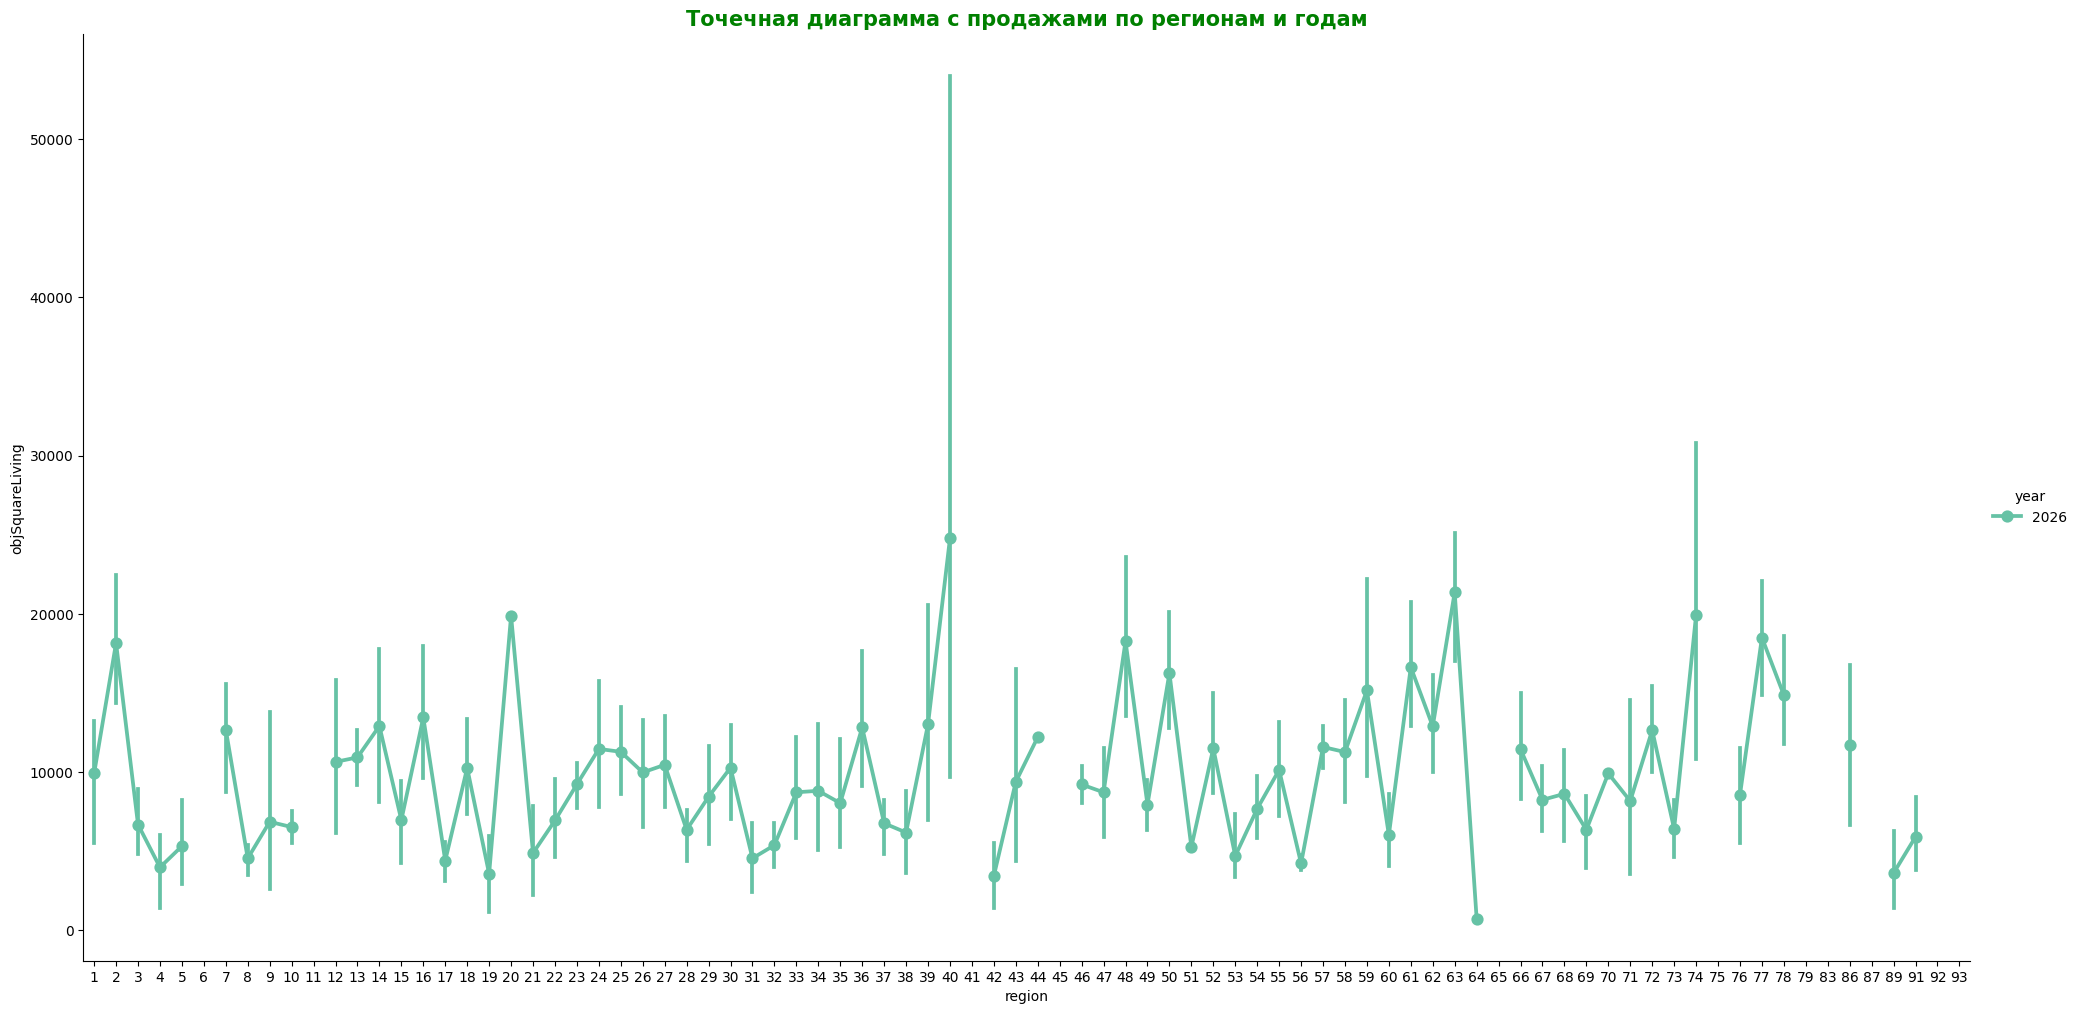

In [26]:
sns.catplot(
    x='region',
    y='objSquareLiving',
    data=df,
    kind='point',
    hue='year',
    dodge=False,
#    hue_order=['2018','2019','2020','2021','2022','2023','2024','2025','2026','2027','2028','2029','2030','2031','2032','2033','2034','2035','2036','2037','2038','2039'],
    hue_order=['2026'],
    palette="Set2",
 #   order=region,
    height=10,
    aspect=2)
plt.title('Точечная диаграмма с продажами по регионам и годам', size=15, color='g', weight='bold');